# Dataset Comparison: UVP5 vs PISCO

This notebook compares the normalization methods and results between UVP5 and PISCO datasets to identify potential issues.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### fixed variables
VOLUME_PER_IMAGE = 50 * (3.5)**2 * np.pi  # in cubic centimeters
VOLUME_PER_IMAGE_LITERS = VOLUME_PER_IMAGE / 1000  # convert to liters
IMAGE_SIZE = 2560


def compare_datasets_normalization():
    """
    Compare key metrics between UVP5 and PISCO datasets
    """
    print("=== DATASET COMPARISON ===")
    
    # You'll need to run the diagnostic functions from both notebooks first
    # and then use their results here
    
    # Comparison metrics to check:
    metrics = {
        'UVP5': {
            'method': 'Direct volume measurement per depth bin',
            'volume_source': 'Measured sampled volume from UVP5 metadata',
            'binning': 'Depth-based binning with measured volumes'
        },
        'PISCO': {
            'method': 'Calculated from image count × fixed volume per image',
            'volume_source': 'Calculated: 50 × (3.5)² × π / 1000 L per image',
            'binning': 'Pressure-based binning with calculated volumes'
        }
    }
    
    for dataset, info in metrics.items():
        print(f"\n{dataset}:")
        for key, value in info.items():
            print(f"  {key}: {value}")
    
    # Key questions to investigate:
    questions = [
        "Are the volume calculations using the same units?",
        "Are both datasets using the same depth/pressure ranges?",
        "Is the PISCO volume per image calculation correct?",
        "Are there differences in the organism size ranges between datasets?",
        "Could there be different detection thresholds or classification criteria?"
    ]
    
    print(f"\n=== KEY QUESTIONS TO INVESTIGATE ===")
    for i, q in enumerate(questions, 1):
        print(f"{i}. {q}")

compare_datasets_normalization()

=== DATASET COMPARISON ===

UVP5:
  method: Direct volume measurement per depth bin
  volume_source: Measured sampled volume from UVP5 metadata
  binning: Depth-based binning with measured volumes

PISCO:
  method: Calculated from image count × fixed volume per image
  volume_source: Calculated: 50 × (3.5)² × π / 1000 L per image
  binning: Pressure-based binning with calculated volumes

=== KEY QUESTIONS TO INVESTIGATE ===
1. Are the volume calculations using the same units?
2. Are both datasets using the same depth/pressure ranges?
3. Is the PISCO volume per image calculation correct?
4. Are there differences in the organism size ranges between datasets?
5. Could there be different detection thresholds or classification criteria?


In [2]:
# Validate PISCO volume calculation
def validate_pisco_volume_calculation():
    """
    Double-check the PISCO volume per image calculation
    """
    print("=== PISCO VOLUME CALCULATION VALIDATION ===")
    
    # From PISCO notebook: VOLUME_PER_IMAGE = 50 * (3.5)**2 * np.pi
    height_cm = 50
    radius_cm = 3.5
    
    volume_cm3 = height_cm * (radius_cm**2) * np.pi
    volume_liters = volume_cm3 / 1000
    
    print(f"Height: {height_cm} cm")
    print(f"Radius: {radius_cm} cm") 
    print(f"Volume per image: {volume_cm3:.3f} cm³")
    print(f"Volume per image: {volume_liters:.6f} L")
    print(f"Current VOLUME_PER_IMAGE_LITERS: {VOLUME_PER_IMAGE_LITERS:.6f} L")
    
    # Check if this seems reasonable compared to UVP5
    print(f"\nIs this volume reasonable?")
    print(f"This represents a cylinder of water {height_cm}cm high with {radius_cm}cm radius")
    print(f"Cross-sectional area: {np.pi * radius_cm**2:.2f} cm²")

validate_pisco_volume_calculation()

=== PISCO VOLUME CALCULATION VALIDATION ===
Height: 50 cm
Radius: 3.5 cm
Volume per image: 1924.226 cm³
Volume per image: 1.924226 L
Current VOLUME_PER_IMAGE_LITERS: 1.924226 L

Is this volume reasonable?
This represents a cylinder of water 50cm high with 3.5cm radius
Cross-sectional area: 38.48 cm²


In [3]:
def load_and_process_datasets():
    """
    Load both UVP5 and PISCO datasets and process them for comparison
    Returns processed data for both datasets
    """
    print("=== LOADING AND PROCESSING DATASETS ===")
    
    # Load UVP5 data (you'll need to adjust paths as needed)
    try:
        # Load UVP5 crop data
        uvp5_crop_df = pd.read_csv("C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/ecotaxa_export__TSV_17905_20250826_1223.tsv", sep="\t")
        
        # Load UVP5 volume data
        profile_files = [
            "C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_037.tsv",
            "C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_050.tsv",
            "C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_060.tsv",
            "C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_075.tsv",
            "C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_081.tsv"
        ]
        uvp5_volume_df = pd.concat([pd.read_csv(f, sep="\t", encoding="latin1") for f in profile_files], ignore_index=True)
        
        print("✓ UVP5 data loaded successfully")
    except Exception as e:
        print(f"✗ Error loading UVP5 data: {e}")
        return None, None, None, None
    
    # Load PISCO data
    try:
        pisco_df = pd.read_csv("C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/top6_biovolume_groups_validated_only.csv")
        pisco_images_df = pd.read_csv("C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/M181_all_images_metadata.csv")
        
        print("✓ PISCO data loaded successfully")
    except Exception as e:
        print(f"✗ Error loading PISCO data: {e}")
        return None, None, None, None
    
    return uvp5_crop_df, uvp5_volume_df, pisco_df, pisco_images_df

def process_uvp5_for_comparison_depth_binned(crop_df, volume_df):
    """
    Process UVP5 data using PROPER depth-binned normalization (same as UVP5_data.ipynb)
    This matches the exact method from your UVP5 analysis notebook
    """
    
    # Category mapping for UVP5
    crop_df = crop_df.copy()
    crop_df['object_annotation_category'] = crop_df['object_annotation_category'].replace(
        {'Calanoida': 'Copepoda_total', 'Copepoda<Maxillopoda': 'Copepoda_total', 'puff': 'Trichodesmium'}
    )
    
    # Calculate volumes if needed
    if 'volume_um3' not in crop_df.columns:
        crop_df['object_esd'] = pd.to_numeric(crop_df['object_esd'], errors='coerce')
        crop_df['volume_um3'] = (4/3) * np.pi * (crop_df['object_esd']/2)**3
    crop_df['volume_mm3'] = crop_df['volume_um3'] / 1e9
    
    # === DEPTH BINNING (same as UVP5_data.ipynb) ===
    depth_bins = np.sort(volume_df['Depth [m]'].unique())
    crop_df['depth_bin'] = pd.cut(
        crop_df['object_depth_min'],
        bins=depth_bins,
        include_lowest=True,
        right=False
    )
    
    # Extract depth bin left edge
    crop_df['depth_bin_left'] = crop_df['depth_bin'].apply(lambda x: x.left if pd.notnull(x) else np.nan)
    
    # === COUNTS NORMALIZATION PER DEPTH BIN ===
    counts = crop_df.groupby(['sample_id', 'depth_bin_left', 'object_annotation_category']).size().reset_index(name='count')
    
    # Merge with depth-specific sampled volumes
    counts = counts.merge(
        volume_df[['Profile', 'Depth [m]', 'Sampled volume [L]']],
        left_on=['sample_id', 'depth_bin_left'],
        right_on=['Profile', 'Depth [m]'],
        how='left'
    )
    
    # Normalize by depth-specific sampled volume
    counts['count_per_liter'] = counts['count'] / counts['Sampled volume [L]']
    
    # Aggregate to profile level
    counts_agg = counts.groupby(['sample_id', 'object_annotation_category'])['count_per_liter'].sum().reset_index()
    counts_agg.rename(columns={'count_per_liter': 'counts_per_L'}, inplace=True)
    
    # === BIOVOLUME NORMALIZATION PER DEPTH BIN ===
    biovolume_df = crop_df.groupby(['sample_id', 'depth_bin_left', 'object_annotation_category'])['volume_um3'].sum().reset_index()
    
    # Merge with depth-specific sampled volumes  
    biovolume_df = biovolume_df.merge(
        volume_df[['Profile', 'Depth [m]', 'Sampled volume [L]']],
        left_on=['sample_id', 'depth_bin_left'],
        right_on=['Profile', 'Depth [m]'],
        how='left'
    )
    
    # Normalize by depth-specific sampled volume
    biovolume_df['biovolume_per_liter'] = biovolume_df['volume_um3'] / biovolume_df['Sampled volume [L]']
    biovolume_df['biovolume_mm3_per_liter'] = biovolume_df['biovolume_per_liter'] / 1e9
    
    # Aggregate to profile level
    biovolume_agg = biovolume_df.groupby(['sample_id', 'object_annotation_category'])['biovolume_mm3_per_liter'].sum().reset_index()
    biovolume_agg.rename(columns={'biovolume_mm3_per_liter': 'biovolume_mm3_per_L'}, inplace=True)
    
    print(f"✓ UVP5 depth-binned normalization completed")
    print(f"   Counts: {len(counts_agg)} records")
    print(f"   Biovolume: {len(biovolume_agg)} records")
    
    return counts_agg, biovolume_agg

def process_pisco_for_comparison(pisco_df, images_df):
    """
    CORRECTED: Process PISCO data using only images from profiles with organism data
    """
    
    # Calculate volumes if needed
    if 'volume_um3' not in pisco_df.columns:
        pisco_df['object_esd'] = pd.to_numeric(pisco_df['object_esd'], errors='coerce')
        pisco_df['volume_um3'] = (4/3) * np.pi * (pisco_df['object_esd']/2)**3
    pisco_df['volume_mm3'] = pisco_df['volume_um3'] / 1e9
    
    # CORRECTED: Filter images to only those matching organism profiles
    def extract_ctd_number(sample_id):
        import re
        match = re.search(r'CTD-(\d+)', str(sample_id))
        if match:
            return match.group(1).zfill(3)
        return None
    
    # Get CTD numbers from organism profiles
    organism_profiles = sorted(pisco_df['sample_id'].unique())
    organism_ctd_numbers = set()
    for profile in organism_profiles:
        ctd_num = extract_ctd_number(profile)
        if ctd_num:
            organism_ctd_numbers.add(ctd_num)
    
    # Filter images to only matching CTD numbers
    matching_image_profiles = []
    for img_profile in images_df['sample_id'].unique():
        img_ctd_num = extract_ctd_number(img_profile)
        if img_ctd_num and img_ctd_num in organism_ctd_numbers:
            matching_image_profiles.append(img_profile)
    
    print(f"✓ PISCO image filtering: {len(matching_image_profiles)} profiles (from {images_df['sample_id'].nunique()} total)")
    
    # Calculate sampled volumes using only filtered images
    filtered_images_df = images_df[images_df['sample_id'].isin(matching_image_profiles)]
    images_counts = filtered_images_df.groupby('sample_id').size().to_dict()
    profiles = sorted(pisco_df['sample_id'].unique())
    
    sampled_records = []
    for p in profiles:
        parts = str(p).split('_')
        core_id = f"{parts[0]}_{parts[1]}" if len(parts) >= 2 else parts[0]
        nimg = int(images_counts.get(core_id, 0))
        sampled_records.append({'sample_id': p, 'sampled_volume_L': nimg * VOLUME_PER_IMAGE_LITERS})
    
    profile_volumes = pd.DataFrame(sampled_records)
    
    # Aggregate counts and biovolume per profile and category
    counts_agg = pisco_df.groupby(['sample_id', 'object_annotation_category']).size().reset_index(name='count')
    biovolume_agg = pisco_df.groupby(['sample_id', 'object_annotation_category'])['volume_mm3'].sum().reset_index(name='biovolume_mm3')
    
    # Merge with sampled volumes and normalize
    counts_agg = counts_agg.merge(profile_volumes, on='sample_id', how='left')
    counts_agg['counts_per_L'] = counts_agg['count'] / counts_agg['sampled_volume_L']
    
    biovolume_agg = biovolume_agg.merge(profile_volumes, on='sample_id', how='left')
    biovolume_agg['biovolume_mm3_per_L'] = biovolume_agg['biovolume_mm3'] / biovolume_agg['sampled_volume_L']
    
    print(f"✓ PISCO corrected normalization completed")
    
    return counts_agg, biovolume_agg

# Load and process data
uvp5_crop, uvp5_volume, pisco_df, pisco_images = load_and_process_datasets()

if uvp5_crop is not None:
    # Use the CORRECT depth-binned method for UVP5
    uvp5_counts, uvp5_biovolume = process_uvp5_for_comparison_depth_binned(uvp5_crop, uvp5_volume)
    pisco_counts, pisco_biovolume = process_pisco_for_comparison(pisco_df, pisco_images)
    print("✓ Data processing completed with proper depth-binned normalization")
else:
    print("✗ Cannot proceed without data")

=== LOADING AND PROCESSING DATASETS ===
✓ UVP5 data loaded successfully


C:\Users\fanny\AppData\Local\Temp\ipykernel_13888\626140710.py:30: DtypeWarning: Columns (0,51,62,63,70,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  pisco_df = pd.read_csv("C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/top6_biovolume_groups_validated_only.csv")


✓ PISCO data loaded successfully


C:\Users\fanny\AppData\Local\Temp\ipykernel_13888\626140710.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = crop_df.groupby(['sample_id', 'depth_bin_left', 'object_annotation_category']).size().reset_index(name='count')
C:\Users\fanny\AppData\Local\Temp\ipykernel_13888\626140710.py:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  biovolume_df = crop_df.groupby(['sample_id', 'depth_bin_left', 'object_annotation_category'])['volume_um3'].sum().reset_index()


✓ UVP5 depth-binned normalization completed
   Counts: 125 records
   Biovolume: 125 records
✓ PISCO image filtering: 5 profiles (from 45 total)
✓ PISCO corrected normalization completed
✓ Data processing completed with proper depth-binned normalization


Saved comparison plot to: C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/plots\uvp5_vs_pisco_comparison.png


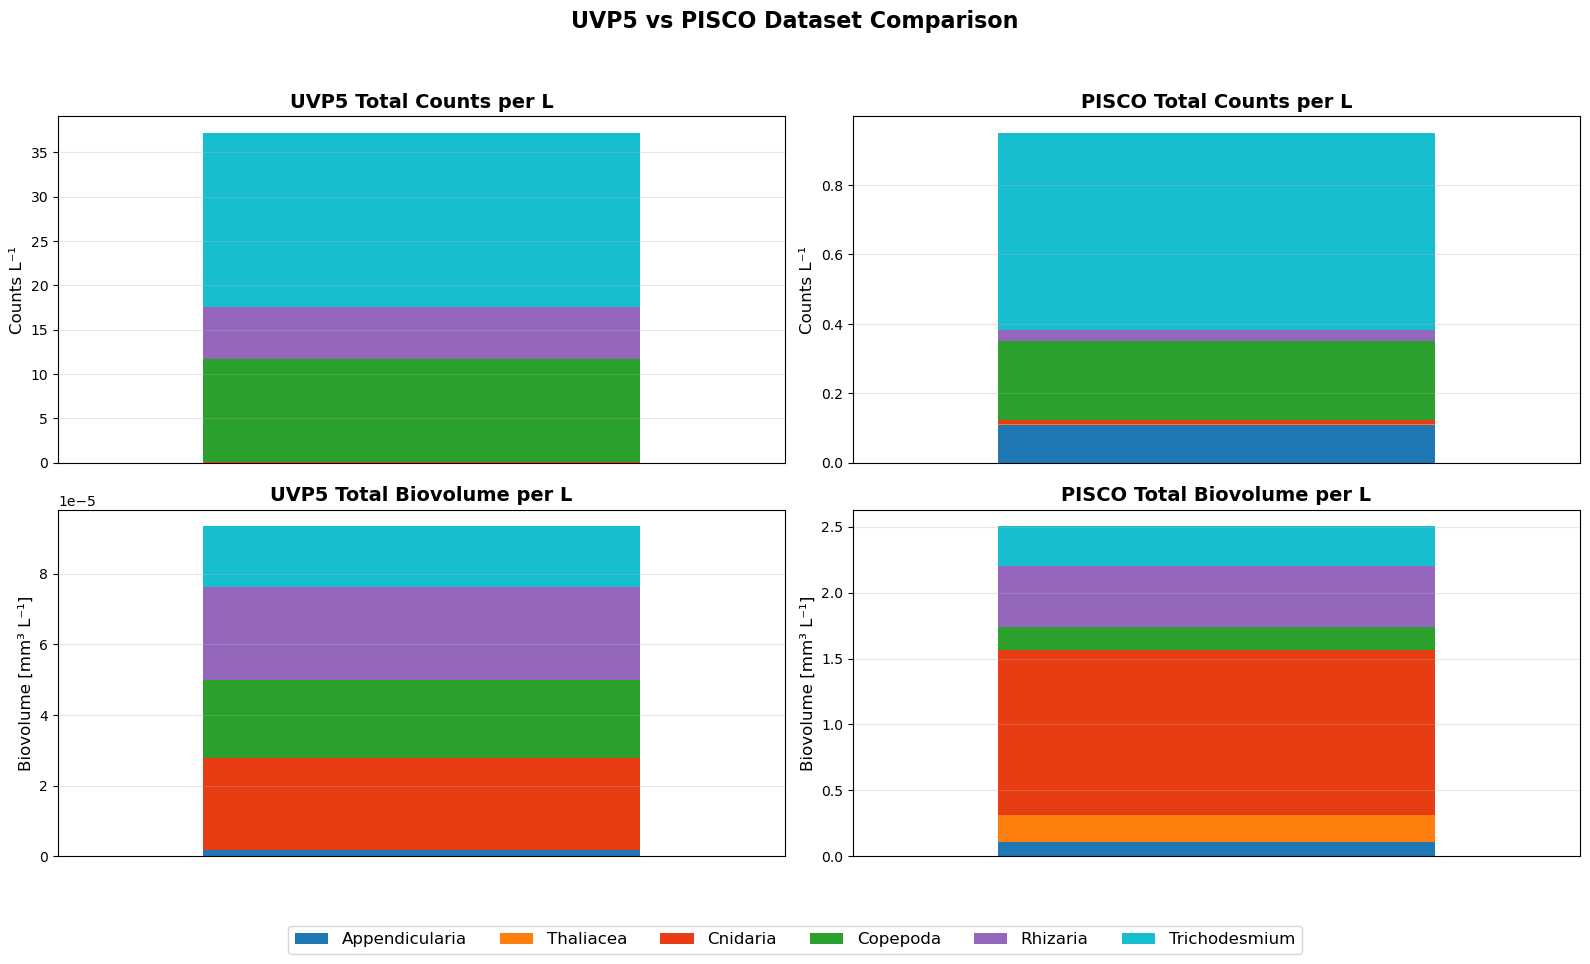


=== COMPARISON STATISTICS ===
UVP5 Total Counts/L: 37.21
PISCO Total Counts/L: 0.95
Ratio (UVP5/PISCO): 39.16x

UVP5 Total Biovolume/L: 0.00 mm³/L
PISCO Total Biovolume/L: 2.50 mm³/L
Ratio (UVP5/PISCO): 0.00x


In [4]:
def create_combined_stacked_plots(uvp5_counts, uvp5_biovolume, pisco_counts, pisco_biovolume, 
                                 save_path=None, figsize=(16, 10)):
    """
    Create combined stacked bar plots showing UVP5 and PISCO data side by side
    """
    
    # Define consistent categories and colors
    main_groups = ["Appendicularia", "Thaliacea", "Cnidaria", "Copepoda", "Rhizaria", "Trichodesmium"]
    # Map UVP5 categories to PISCO categories for consistency
    category_mapping = {
        "Cnidaria<Metazoa": "Cnidaria",
        "Copepoda_total": "Copepoda"
    }
    
    group_colors = ["#1f77b4", "#ff7f0e", "#e83c12", "#2ca02c", "#9467bd", "#17becf"]
    color_dict = dict(zip(main_groups, group_colors))
    
    # Process UVP5 data
    uvp5_counts_proc = uvp5_counts.copy()
    uvp5_biovolume_proc = uvp5_biovolume.copy()
    
    # Map UVP5 categories
    for old_cat, new_cat in category_mapping.items():
        uvp5_counts_proc['object_annotation_category'] = uvp5_counts_proc['object_annotation_category'].replace(old_cat, new_cat)
        uvp5_biovolume_proc['object_annotation_category'] = uvp5_biovolume_proc['object_annotation_category'].replace(old_cat, new_cat)
    
    # Aggregate to get totals per dataset and category
    uvp5_counts_total = uvp5_counts_proc.groupby('object_annotation_category')['counts_per_L'].sum()
    uvp5_biovolume_total = uvp5_biovolume_proc.groupby('object_annotation_category')['biovolume_mm3_per_L'].sum()
    
    pisco_counts_total = pisco_counts.groupby('object_annotation_category')['counts_per_L'].sum()
    pisco_biovolume_total = pisco_biovolume.groupby('object_annotation_category')['biovolume_mm3_per_L'].sum()
    
    # Ensure all categories are present in both datasets
    for cat in main_groups:
        if cat not in uvp5_counts_total.index:
            uvp5_counts_total[cat] = 0
        if cat not in uvp5_biovolume_total.index:
            uvp5_biovolume_total[cat] = 0
        if cat not in pisco_counts_total.index:
            pisco_counts_total[cat] = 0
        if cat not in pisco_biovolume_total.index:
            pisco_biovolume_total[cat] = 0
    
    # Reorder by main_groups
    uvp5_counts_total = uvp5_counts_total.reindex(main_groups, fill_value=0)
    uvp5_biovolume_total = uvp5_biovolume_total.reindex(main_groups, fill_value=0)
    pisco_counts_total = pisco_counts_total.reindex(main_groups, fill_value=0)
    pisco_biovolume_total = pisco_biovolume_total.reindex(main_groups, fill_value=0)
    
    # Create the combined plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
    
    # Plot 1: UVP5 Counts
    bottom1 = 0
    for i, cat in enumerate(main_groups):
        val = uvp5_counts_total[cat]
        ax1.bar(0, val, bottom=bottom1, color=color_dict[cat], label=cat, width=0.6)
        bottom1 += val
    ax1.set_title('UVP5 Total Counts per L', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Counts L⁻¹', fontsize=12)
    ax1.set_xlim(-0.5, 0.5)
    ax1.set_xticks([])
    ax1.grid(axis='y', alpha=0.3)
    
    # Plot 2: PISCO Counts  
    bottom2 = 0
    for i, cat in enumerate(main_groups):
        val = pisco_counts_total[cat]
        ax2.bar(0, val, bottom=bottom2, color=color_dict[cat], width=0.6)
        bottom2 += val
    ax2.set_title('PISCO Total Counts per L', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Counts L⁻¹', fontsize=12)
    ax2.set_xlim(-0.5, 0.5)
    ax2.set_xticks([])
    ax2.grid(axis='y', alpha=0.3)
    
    # Plot 3: UVP5 Biovolume
    bottom3 = 0
    for i, cat in enumerate(main_groups):
        val = uvp5_biovolume_total[cat]
        ax3.bar(0, val, bottom=bottom3, color=color_dict[cat], width=0.6)
        bottom3 += val
    ax3.set_title('UVP5 Total Biovolume per L', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Biovolume [mm³ L⁻¹]', fontsize=12)
    ax3.set_xlim(-0.5, 0.5)
    ax3.set_xticks([])
    ax3.grid(axis='y', alpha=0.3)
    
    # Plot 4: PISCO Biovolume
    bottom4 = 0
    for i, cat in enumerate(main_groups):
        val = pisco_biovolume_total[cat]
        ax4.bar(0, val, bottom=bottom4, color=color_dict[cat], width=0.6)
        bottom4 += val
    ax4.set_title('PISCO Total Biovolume per L', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Biovolume [mm³ L⁻¹]', fontsize=12)
    ax4.set_xlim(-0.5, 0.5)
    ax4.set_xticks([])
    ax4.grid(axis='y', alpha=0.3)
    
    # Add a shared legend
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.02), ncol=6, fontsize=12)
    
    plt.suptitle('UVP5 vs PISCO Dataset Comparison', fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout(rect=[0, 0.08, 1, 0.92])
    
    if save_path:
        import os
        os.makedirs(save_path, exist_ok=True)
        fname = os.path.join(save_path, 'uvp5_vs_pisco_comparison.png')
        fig.savefig(fname, dpi=300, bbox_inches='tight')
        print(f'Saved comparison plot to: {fname}')
    
    plt.show()
    
    # Print comparison statistics
    print("\n=== COMPARISON STATISTICS ===")
    print(f"UVP5 Total Counts/L: {uvp5_counts_total.sum():.2f}")
    print(f"PISCO Total Counts/L: {pisco_counts_total.sum():.2f}")
    print(f"Ratio (UVP5/PISCO): {uvp5_counts_total.sum() / pisco_counts_total.sum():.2f}x")
    
    print(f"\nUVP5 Total Biovolume/L: {uvp5_biovolume_total.sum():.2f} mm³/L")
    print(f"PISCO Total Biovolume/L: {pisco_biovolume_total.sum():.2f} mm³/L")
    print(f"Ratio (UVP5/PISCO): {uvp5_biovolume_total.sum() / pisco_biovolume_total.sum():.2f}x")
    
    return fig, (uvp5_counts_total, pisco_counts_total, uvp5_biovolume_total, pisco_biovolume_total)

# Create the combined plots
if 'uvp5_counts' in locals():
    fig, totals = create_combined_stacked_plots(
        uvp5_counts, uvp5_biovolume, pisco_counts, pisco_biovolume,
        save_path='C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/plots'
    )

Saved side-by-side plot to: C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/plots\uvp5_vs_pisco_sidebyside.png


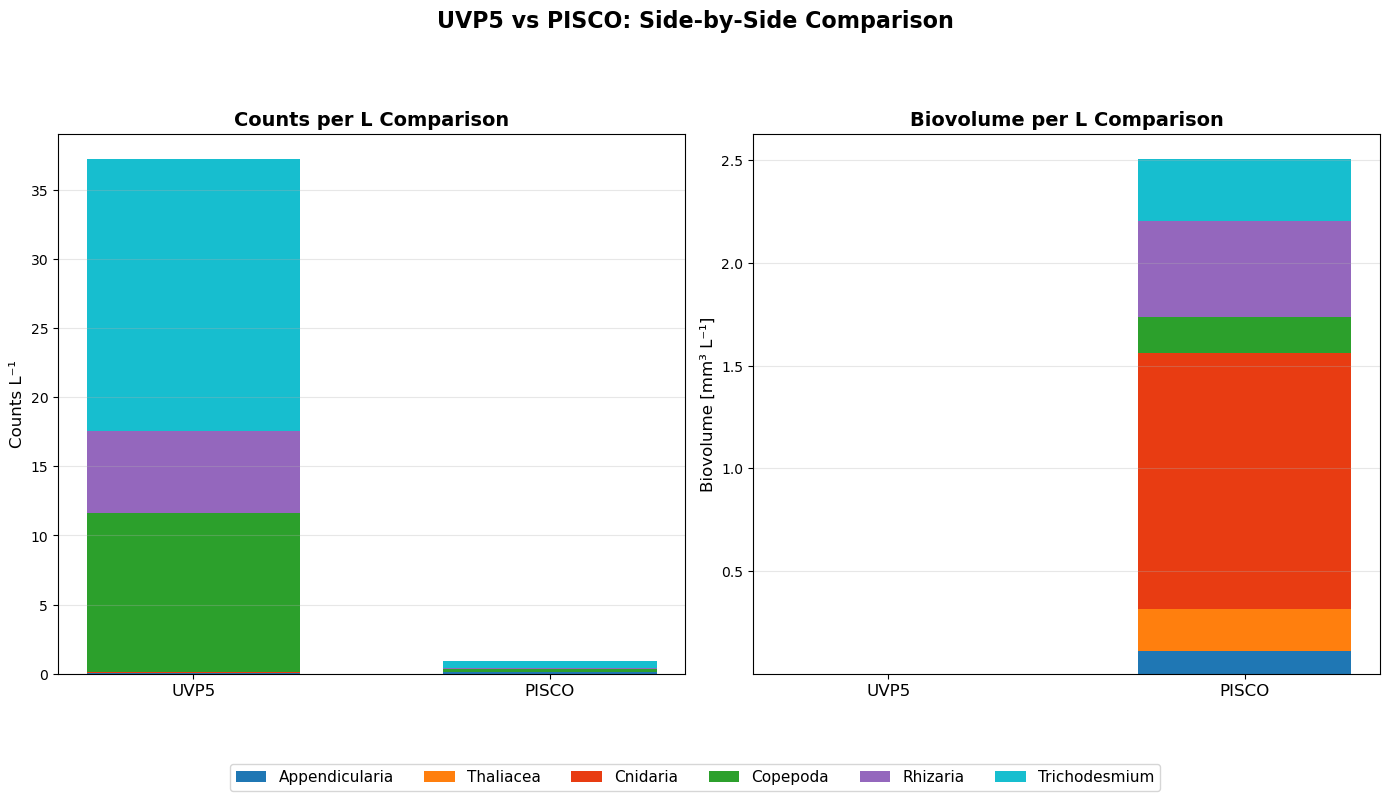

In [5]:
def create_side_by_side_comparison(uvp5_counts, uvp5_biovolume, pisco_counts, pisco_biovolume, 
                                  save_path=None, figsize=(14, 8)):
    """
    Create side-by-side stacked bar plots for direct comparison
    """
    
    # Define consistent categories and colors
    main_groups = ["Appendicularia", "Thaliacea", "Cnidaria", "Copepoda", "Rhizaria", "Trichodesmium"]
    category_mapping = {
        "Cnidaria<Metazoa": "Cnidaria",
        "Copepoda_total": "Copepoda"
    }
    
    group_colors = ["#1f77b4", "#ff7f0e", "#e83c12", "#2ca02c", "#9467bd", "#17becf"]
    color_dict = dict(zip(main_groups, group_colors))
    
    # Process data same as before
    uvp5_counts_proc = uvp5_counts.copy()
    uvp5_biovolume_proc = uvp5_biovolume.copy()
    
    for old_cat, new_cat in category_mapping.items():
        uvp5_counts_proc['object_annotation_category'] = uvp5_counts_proc['object_annotation_category'].replace(old_cat, new_cat)
        uvp5_biovolume_proc['object_annotation_category'] = uvp5_biovolume_proc['object_annotation_category'].replace(old_cat, new_cat)
    
    # Get totals
    uvp5_counts_total = uvp5_counts_proc.groupby('object_annotation_category')['counts_per_L'].sum()
    uvp5_biovolume_total = uvp5_biovolume_proc.groupby('object_annotation_category')['biovolume_mm3_per_L'].sum()
    pisco_counts_total = pisco_counts.groupby('object_annotation_category')['counts_per_L'].sum()
    pisco_biovolume_total = pisco_biovolume.groupby('object_annotation_category')['biovolume_mm3_per_L'].sum()
    
    # Ensure all categories present
    for cat in main_groups:
        for total_series in [uvp5_counts_total, uvp5_biovolume_total, pisco_counts_total, pisco_biovolume_total]:
            if cat not in total_series.index:
                total_series[cat] = 0
    
    # Reorder
    uvp5_counts_total = uvp5_counts_total.reindex(main_groups, fill_value=0)
    uvp5_biovolume_total = uvp5_biovolume_total.reindex(main_groups, fill_value=0)
    pisco_counts_total = pisco_counts_total.reindex(main_groups, fill_value=0)
    pisco_biovolume_total = pisco_biovolume_total.reindex(main_groups, fill_value=0)
    
    # Create side-by-side plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Counts comparison
    x_pos = np.array([0, 1])  # UVP5 and PISCO positions
    width = 0.6
    
    # Plot counts
    uvp5_bottom = 0
    pisco_bottom = 0
    
    for i, cat in enumerate(main_groups):
        uvp5_val = uvp5_counts_total[cat]
        pisco_val = pisco_counts_total[cat]
        
        ax1.bar(x_pos[0], uvp5_val, bottom=uvp5_bottom, color=color_dict[cat], 
                width=width, label=cat if i == 0 else "")
        ax1.bar(x_pos[1], pisco_val, bottom=pisco_bottom, color=color_dict[cat], 
                width=width)
        
        uvp5_bottom += uvp5_val
        pisco_bottom += pisco_val
    
    ax1.set_title('Counts per L Comparison', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Counts L⁻¹', fontsize=12)
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(['UVP5', 'PISCO'], fontsize=12)
    ax1.grid(axis='y', alpha=0.3)
    
    # Plot biovolume
    uvp5_bottom = 0
    pisco_bottom = 0
    
    for i, cat in enumerate(main_groups):
        uvp5_val = uvp5_biovolume_total[cat]
        pisco_val = pisco_biovolume_total[cat]
        
        ax2.bar(x_pos[0], uvp5_val, bottom=uvp5_bottom, color=color_dict[cat], 
                width=width, label=cat)
        ax2.bar(x_pos[1], pisco_val, bottom=pisco_bottom, color=color_dict[cat], 
                width=width)
        
        uvp5_bottom += uvp5_val
        pisco_bottom += pisco_val
    
    ax2.set_title('Biovolume per L Comparison', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Biovolume [mm³ L⁻¹]', fontsize=12)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(['UVP5', 'PISCO'], fontsize=12)
    ax2.grid(axis='y', alpha=0.3)
    
    # Legend
    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.02), ncol=6, fontsize=11)
    
    plt.suptitle('UVP5 vs PISCO: Side-by-Side Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.1, 1, 0.92])
    
    if save_path:
        import os
        os.makedirs(save_path, exist_ok=True)
        fname = os.path.join(save_path, 'uvp5_vs_pisco_sidebyside.png')
        fig.savefig(fname, dpi=300, bbox_inches='tight')
        print(f'Saved side-by-side plot to: {fname}')
    
    plt.show()
    return fig

# Create side-by-side comparison
if 'uvp5_counts' in locals():
    fig_sidebyside = create_side_by_side_comparison(
        uvp5_counts, uvp5_biovolume, pisco_counts, pisco_biovolume,
        save_path='C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/plots'
    )

In [6]:
def verify_normalization_methods():
    """
    Verify that both datasets are properly normalized by sampled volume
    and compare the normalization methods used
    """
    print("=== NORMALIZATION VERIFICATION ===")
    
    if 'uvp5_counts' not in locals() or 'pisco_counts' not in locals():
        print("❌ Data not loaded. Run the previous cells first.")
        return
    
    print("\n1. UVP5 NORMALIZATION METHOD:")
    print("   • Uses measured sampled volumes from UVP5 metadata files")
    print("   • Volume measured per depth bin")
    print("   • Formula: counts_per_L = raw_counts / measured_sampled_volume_L")
    
    # Check UVP5 normalization
    uvp5_sample = uvp5_counts.head(3)
    print(f"\n   UVP5 Sample data verification:")
    for _, row in uv5_sample.iterrows():
        if pd.notna(row['counts_per_L']) and pd.notna(row['count']) and pd.notna(row['sampled_volume_L']):
            calculated = row['count'] / row['sampled_volume_L']
            stored = row['counts_per_L']
            print(f"   Profile {row['sample_id']}: {row['count']} counts ÷ {row['sampled_volume_L']:.4f} L = {calculated:.3f} (stored: {stored:.3f})")
    
    print("\n2. PISCO NORMALIZATION METHOD:")
    print("   • Uses calculated sampled volumes from image counts")
    print("   • Volume = n_images × volume_per_image")
    print(f"   • Volume per image = {VOLUME_PER_IMAGE:.3f} cm³ = {VOLUME_PER_IMAGE_L:.6f} L")
    print("   • Formula: counts_per_L = raw_counts / (n_images × volume_per_image_L)")
    
    # Check PISCO normalization
    pisco_sample = pisco_counts.head(3)
    print(f"\n   PISCO Sample data verification:")
    for _, row in pisco_sample.iterrows():
        if pd.notna(row['counts_per_L']) and pd.notna(row['count']) and pd.notna(row['sampled_volume_L']):
            calculated = row['count'] / row['sampled_volume_L']
            stored = row['counts_per_L']
            n_images = row['sampled_volume_L'] / VOLUME_PER_IMAGE_LITERS
            print(f"   Profile {row['sample_id']}: {row['count']} counts ÷ {row['sampled_volume_L']:.4f} L = {calculated:.3f} (stored: {stored:.3f})")
            print(f"     └─ Volume from ~{n_images:.0f} images × {VOLUME_PER_IMAGE_L:.6f} L/image")
    
    print("\n3. COMPARISON SUMMARY:")
    
    # Calculate total volumes
    uvp5_total_volume = uvp5_counts['sampled_volume_L'].sum() if 'sampled_volume_L' in uvp5_counts.columns else 0
    pisco_total_volume = pisco_counts['sampled_volume_L'].sum() if 'sampled_volume_L' in pisco_counts.columns else 0
    
    # Calculate total raw counts
    uvp5_total_raw = uvp5_counts['count'].sum() if 'count' in uvp5_counts.columns else 0
    pisco_total_raw = pisco_counts['count'].sum() if 'count' in pisco_counts.columns else 0
    
    # Calculate total normalized counts
    uvp5_total_norm = uvp5_counts['counts_per_L'].sum() if 'counts_per_L' in uvp5_counts.columns else 0
    pisco_total_norm = pisco_counts['counts_per_L'].sum() if 'counts_per_L' in pisco_counts.columns else 0
    
    print(f"   UVP5:")
    print(f"     • Total sampled volume: {uvp5_total_volume:.3f} L")
    print(f"     • Total raw counts: {uvp5_total_raw:,}")
    print(f"     • Total normalized counts: {uvp5_total_norm:.2f} counts/L")
    print(f"     • Average density: {uvp5_total_raw/uvp5_total_volume:.2f} counts/L")
    
    print(f"   PISCO:")
    print(f"     • Total sampled volume: {pisco_total_volume:.3f} L")
    print(f"     • Total raw counts: {pisco_total_raw:,}")
    print(f"     • Total normalized counts: {pisco_total_norm:.2f} counts/L")
    print(f"     • Average density: {pisco_total_raw/pisco_total_volume:.2f} counts/L")
    
    # Density comparison
    if uvp5_total_volume > 0 and pisco_total_volume > 0:
        uvp5_density = uvp5_total_raw / uvp5_total_volume
        pisco_density = pisco_total_raw / pisco_total_volume
        ratio = uvp5_density / pisco_density
        
        print(f"\n4. DENSITY COMPARISON:")
        print(f"   • UVP5 density: {uvp5_density:.2f} individuals/L")
        print(f"   • PISCO density: {pisco_density:.2f} individuals/L")
        print(f"   • Ratio (UVP5/PISCO): {ratio:.2f}x")
        
        if ratio > 5:
            print(f"   ⚠️  UVP5 density is {ratio:.1f}x higher - this suggests potential issues:")
            print(f"       - Different size detection thresholds")
            print(f"       - Different water masses or sampling conditions")
            print(f"       - Potential errors in volume calculations")
        elif ratio > 2:
            print(f"   ℹ️  UVP5 density is {ratio:.1f}x higher - moderate difference that could be due to:")
            print(f"       - Different sampling methods")
            print(f"       - Different temporal/spatial coverage")
        else:
            print(f"   ✅ Densities are reasonably similar")
    
    return {
        'uvp5_total_volume': uvp5_total_volume,
        'pisco_total_volume': pisco_total_volume,
        'uvp5_density': uvp5_total_raw / uvp5_total_volume if uvp5_total_volume > 0 else 0,
        'pisco_density': pisco_total_raw / pisco_total_volume if pisco_total_volume > 0 else 0
    }

# Run verification
if 'uvp5_counts' in locals():
    normalization_results = verify_normalization_methods()

=== NORMALIZATION VERIFICATION ===
❌ Data not loaded. Run the previous cells first.


Found 5 matching CTD profiles: ['037', '050', '060', '075', '081']

Profile mapping:
  CTD-037: UVP5='c_m181_037' | PISCO='M181-112-1_CTD-037_00°00S-008°00W_20220504-1758'
  CTD-050: UVP5='c_m181_050' | PISCO='M181-175-1_CTD-050_00°00S-019°00W_20220509-0543'
  CTD-060: UVP5='c_m181_060' | PISCO='M181-227-1_CTD-060_00°00S-027°00W_20220512-1748'
  CTD-075: UVP5='c_m181_075' | PISCO='M181-285-1_CTD-075_00°00S-039°00W_20220517-2024'
  CTD-081: UVP5='c_m181_081' | PISCO='M181-297-1_CTD-081_00°00S-041°50W_20220519-0218'
Saved profile comparison plot to: C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/plots\uvp5_vs_pisco_profile_comparison.png


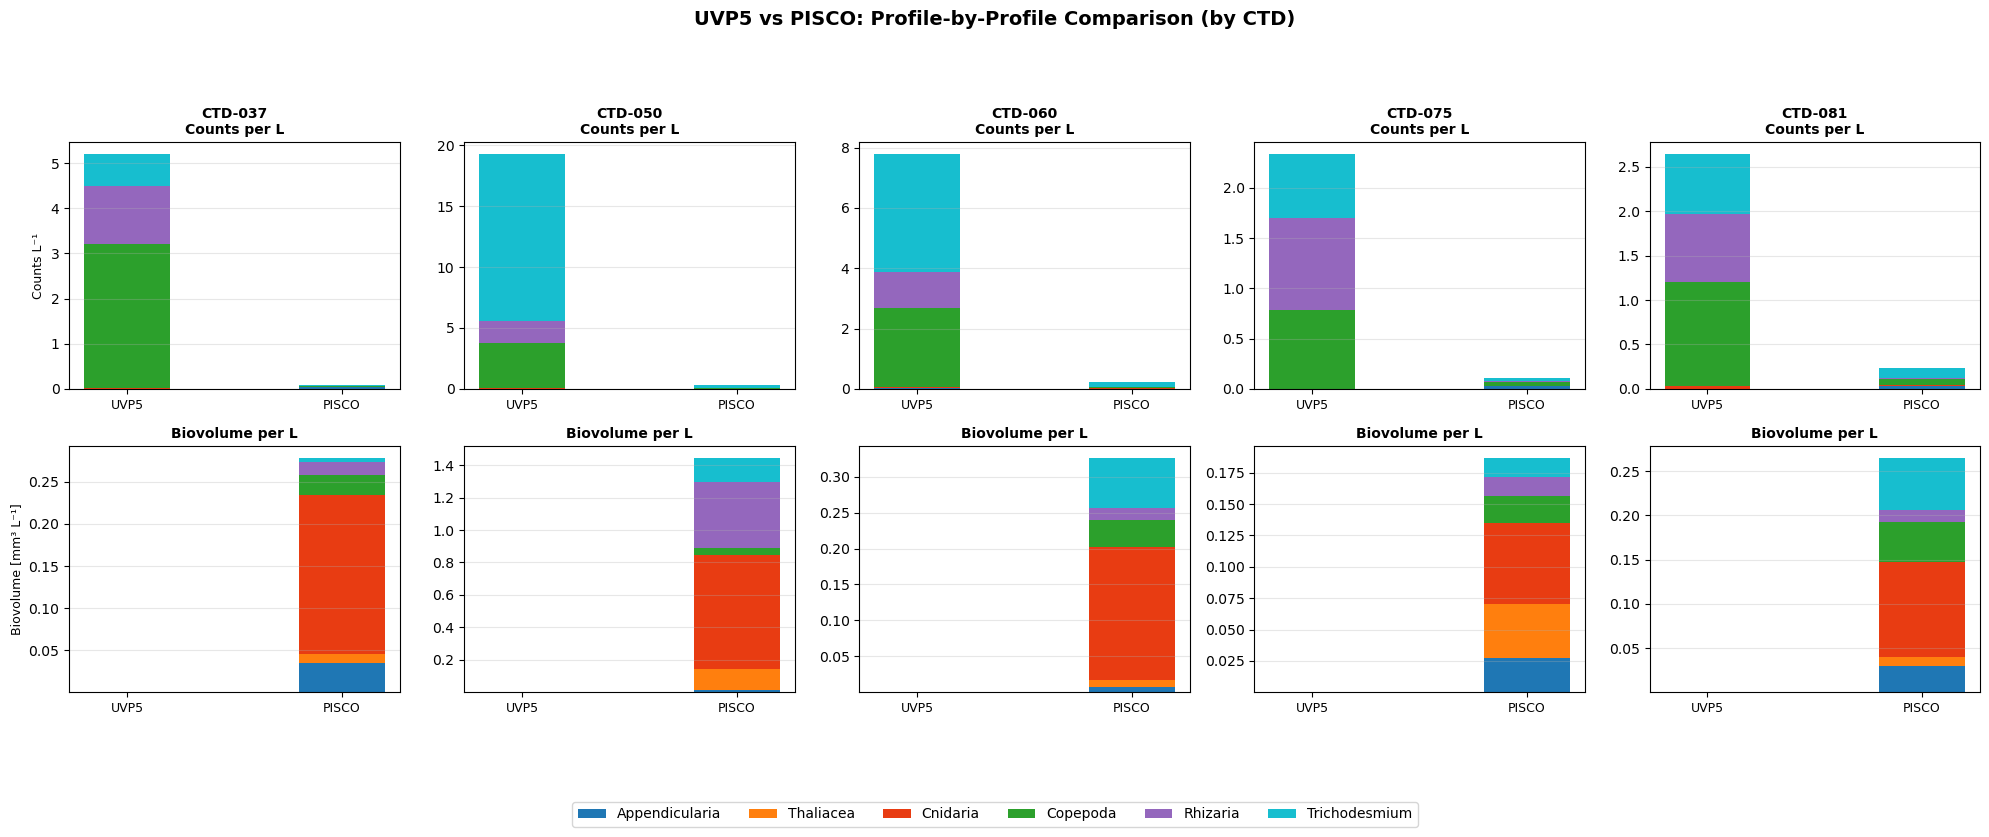


=== PROFILE-BY-PROFILE STATISTICS ===

CTD-037:
  UVP5: 5.20 counts/L, 0.000 mm³/L
  PISCO: 0.08 counts/L, 0.279 mm³/L
  Ratios (UVP5/PISCO): 68.54x counts, 0.00x biovolume

CTD-050:
  UVP5: 19.26 counts/L, 0.000 mm³/L
  PISCO: 0.30 counts/L, 1.446 mm³/L
  Ratios (UVP5/PISCO): 64.00x counts, 0.00x biovolume

CTD-060:
  UVP5: 7.78 counts/L, 0.000 mm³/L
  PISCO: 0.24 counts/L, 0.327 mm³/L
  Ratios (UVP5/PISCO): 32.79x counts, 0.00x biovolume

CTD-075:
  UVP5: 2.33 counts/L, 0.000 mm³/L
  PISCO: 0.10 counts/L, 0.187 mm³/L
  Ratios (UVP5/PISCO): 22.47x counts, 0.00x biovolume

CTD-081:
  UVP5: 2.64 counts/L, 0.000 mm³/L
  PISCO: 0.23 counts/L, 0.265 mm³/L
  Ratios (UVP5/PISCO): 11.37x counts, 0.00x biovolume


In [7]:
def create_profile_by_profile_comparison(uvp5_counts, uvp5_biovolume, pisco_counts, pisco_biovolume, 
                                        save_path=None, figsize=(20, 8)):
    """
    Create profile-by-profile comparison showing UVP5 and PISCO data side by side for each profile
    Based on CTD numbers extracted from sample_id columns
    """
    
    # Define consistent categories and colors
    main_groups = ["Appendicularia", "Thaliacea", "Cnidaria", "Copepoda", "Rhizaria", "Trichodesmium"]
    category_mapping = {
        "Cnidaria<Metazoa": "Cnidaria",
        "Copepoda_total": "Copepoda"
    }
    
    group_colors = ["#1f77b4", "#ff7f0e", "#e83c12", "#2ca02c", "#9467bd", "#17becf"]
    color_dict = dict(zip(main_groups, group_colors))
    
    # Process UVP5 data
    uvp5_counts_proc = uvp5_counts.copy()
    uvp5_biovolume_proc = uvp5_biovolume.copy()
    
    for old_cat, new_cat in category_mapping.items():
        uvp5_counts_proc['object_annotation_category'] = uvp5_counts_proc['object_annotation_category'].replace(old_cat, new_cat)
        uvp5_biovolume_proc['object_annotation_category'] = uvp5_biovolume_proc['object_annotation_category'].replace(old_cat, new_cat)
    
    # Get profile-level data
    uvp5_counts_by_profile = uvp5_counts_proc.groupby(['sample_id', 'object_annotation_category'])['counts_per_L'].sum().unstack(fill_value=0)
    uvp5_biovolume_by_profile = uvp5_biovolume_proc.groupby(['sample_id', 'object_annotation_category'])['biovolume_mm3_per_L'].sum().unstack(fill_value=0)
    
    pisco_counts_by_profile = pisco_counts.groupby(['sample_id', 'object_annotation_category'])['counts_per_L'].sum().unstack(fill_value=0)
    # CORRECTED: Use biovolume_mm3_per_L instead of biovolume_mm3
    pisco_biovolume_by_profile = pisco_biovolume.groupby(['sample_id', 'object_annotation_category'])['biovolume_mm3_per_L'].sum().unstack(fill_value=0)
    
    # Extract profile numbers for matching based on CTD numbers
    def extract_ctd_number(sample_id):
        import re
        # For PISCO: Look for CTD- followed by digits
        match = re.search(r'CTD-(\d+)', str(sample_id))
        if match:
            return match.group(1).zfill(3)  # Pad to 3 digits
        
        # For UVP5: Look for numbers after "m181_" (e.g., "c_m181_037" -> "037")
        match = re.search(r'm181_(\d+)', str(sample_id))
        if match:
            return match.group(1).zfill(3)  # Pad to 3 digits
        
        # Fallback: Look for 3-digit numbers anywhere
        match = re.search(r'(\d{3})', str(sample_id))
        if match:
            return match.group(1)
        
        # Additional fallback for any 1-3 digit numbers at end of string parts
        parts = str(sample_id).split('_')
        for part in reversed(parts):  # Check from end to beginning
            if part.isdigit() and 1 <= len(part) <= 3:
                return part.zfill(3)
        
        return None
    
    # Map profiles by their CTD numbers
    uvp5_profile_map = {}
    for profile in uvp5_counts_by_profile.index:
        ctd_num = extract_ctd_number(profile)
        if ctd_num:
            uvp5_profile_map[ctd_num] = profile
    
    pisco_profile_map = {}
    for profile in pisco_counts_by_profile.index:
        ctd_num = extract_ctd_number(profile)
        if ctd_num:
            pisco_profile_map[ctd_num] = profile
    
    # Find common CTD numbers
    common_ctds = set(uvp5_profile_map.keys()) & set(pisco_profile_map.keys())
    common_ctds = sorted(list(common_ctds))
    
    print(f"Found {len(common_ctds)} matching CTD profiles: {common_ctds}")
    print("\nProfile mapping:")
    for ctd in common_ctds:
        print(f"  CTD-{ctd}: UVP5='{uvp5_profile_map[ctd]}' | PISCO='{pisco_profile_map[ctd]}'")
    
    if not common_ctds:
        print("No matching CTD profiles found between datasets!")
        print("\nUVP5 profiles:", list(uvp5_profile_map.keys()))
        print("PISCO profiles:", list(pisco_profile_map.keys()))
        return None
    
    # Ensure all categories are present in both datasets
    for df in [uvp5_counts_by_profile, uvp5_biovolume_by_profile, pisco_counts_by_profile, pisco_biovolume_by_profile]:
        for cat in main_groups:
            if cat not in df.columns:
                df[cat] = 0
    
    # Reorder columns
    uvp5_counts_by_profile = uvp5_counts_by_profile.reindex(columns=main_groups, fill_value=0)
    uvp5_biovolume_by_profile = uvp5_biovolume_by_profile.reindex(columns=main_groups, fill_value=0)
    pisco_counts_by_profile = pisco_counts_by_profile.reindex(columns=main_groups, fill_value=0)
    pisco_biovolume_by_profile = pisco_biovolume_by_profile.reindex(columns=main_groups, fill_value=0)
    
    # Create plots
    n_profiles = len(common_ctds)
    fig, axes = plt.subplots(2, n_profiles, figsize=(max(4*n_profiles, 16), 8))
    
    if n_profiles == 1:
        axes = axes.reshape(2, 1)
    
    for i, ctd_num in enumerate(common_ctds):
        uvp5_profile = uvp5_profile_map[ctd_num]
        pisco_profile = pisco_profile_map[ctd_num]
        
        # Get data for this profile
        uvp5_counts_data = uvp5_counts_by_profile.loc[uvp5_profile] if uvp5_profile in uvp5_counts_by_profile.index else pd.Series(0, index=main_groups)
        uvp5_biovolume_data = uvp5_biovolume_by_profile.loc[uvp5_profile] if uvp5_profile in uvp5_biovolume_by_profile.index else pd.Series(0, index=main_groups)
        pisco_counts_data = pisco_counts_by_profile.loc[pisco_profile] if pisco_profile in pisco_counts_by_profile.index else pd.Series(0, index=main_groups)
        pisco_biovolume_data = pisco_biovolume_by_profile.loc[pisco_profile] if pisco_profile in pisco_biovolume_by_profile.index else pd.Series(0, index=main_groups)
        
        # Plot counts (top row)
        ax_counts = axes[0, i]
        x_pos = np.array([0, 1])
        width = 0.4
        
        uvp5_bottom = 0
        pisco_bottom = 0
        
        for j, cat in enumerate(main_groups):
            uvp5_val = uvp5_counts_data[cat]
            pisco_val = pisco_counts_data[cat]
            
            ax_counts.bar(x_pos[0], uvp5_val, bottom=uvp5_bottom, color=color_dict[cat], 
                         width=width, label=cat if i == 0 else "")
            ax_counts.bar(x_pos[1], pisco_val, bottom=pisco_bottom, color=color_dict[cat], 
                         width=width)
            
            uvp5_bottom += uvp5_val
            pisco_bottom += pisco_val
        
        ax_counts.set_title(f'CTD-{ctd_num}\nCounts per L', fontsize=10, fontweight='bold')
        ax_counts.set_xticks(x_pos)
        ax_counts.set_xticklabels(['UVP5', 'PISCO'], fontsize=9)
        ax_counts.grid(axis='y', alpha=0.3)
        if i == 0:
            ax_counts.set_ylabel('Counts L⁻¹', fontsize=9)
        
        # Plot biovolume (bottom row)
        ax_biovolume = axes[1, i]
        
        uvp5_bottom = 0
        pisco_bottom = 0
        
        for j, cat in enumerate(main_groups):
            uvp5_val = uvp5_biovolume_data[cat]
            pisco_val = pisco_biovolume_data[cat]
            
            ax_biovolume.bar(x_pos[0], uvp5_val, bottom=uvp5_bottom, color=color_dict[cat], 
                           width=width, label=cat if i == 0 else "")
            ax_biovolume.bar(x_pos[1], pisco_val, bottom=pisco_bottom, color=color_dict[cat], 
                           width=width)
            
            uvp5_bottom += uvp5_val
            pisco_bottom += pisco_val
        
        ax_biovolume.set_title(f'Biovolume per L', fontsize=10, fontweight='bold')
        ax_biovolume.set_xticks(x_pos)
        ax_biovolume.set_xticklabels(['UVP5', 'PISCO'], fontsize=9)
        ax_biovolume.grid(axis='y', alpha=0.3)
        if i == 0:
            ax_biovolume.set_ylabel('Biovolume [mm³ L⁻¹]', fontsize=9)
    
    # Add legend
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=6, fontsize=10)
    
    plt.suptitle('UVP5 vs PISCO: Profile-by-Profile Comparison (by CTD)', fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0.08, 1, 0.92])
    
    if save_path:
        import os
        os.makedirs(save_path, exist_ok=True)
        fname = os.path.join(save_path, 'uvp5_vs_pisco_profile_comparison.png')
        fig.savefig(fname, dpi=300, bbox_inches='tight')
        print(f'Saved profile comparison plot to: {fname}')
    
    plt.show()
    
    # Print summary statistics for each profile
    print("\n=== PROFILE-BY-PROFILE STATISTICS ===")
    for ctd_num in common_ctds:
        uvp5_profile = uvp5_profile_map[ctd_num]
        pisco_profile = pisco_profile_map[ctd_num]
        
        uvp5_counts_total = uvp5_counts_by_profile.loc[uvp5_profile].sum() if uvp5_profile in uvp5_counts_by_profile.index else 0
        pisco_counts_total = pisco_counts_by_profile.loc[pisco_profile].sum() if pisco_profile in pisco_counts_by_profile.index else 0
        
        uvp5_biovolume_total = uvp5_biovolume_by_profile.loc[uvp5_profile].sum() if uvp5_profile in uvp5_biovolume_by_profile.index else 0
        pisco_biovolume_total = pisco_biovolume_by_profile.loc[pisco_profile].sum() if pisco_profile in pisco_biovolume_by_profile.index else 0
        
        counts_ratio = uvp5_counts_total / pisco_counts_total if pisco_counts_total > 0 else np.inf
        biovolume_ratio = uvp5_biovolume_total / pisco_biovolume_total if pisco_biovolume_total > 0 else np.inf
        
        print(f"\nCTD-{ctd_num}:")
        print(f"  UVP5: {uvp5_counts_total:.2f} counts/L, {uvp5_biovolume_total:.3f} mm³/L")
        print(f"  PISCO: {pisco_counts_total:.2f} counts/L, {pisco_biovolume_total:.3f} mm³/L")
        print(f"  Ratios (UVP5/PISCO): {counts_ratio:.2f}x counts, {biovolume_ratio:.2f}x biovolume")
    
    return fig

# Create profile-by-profile comparison
if 'uvp5_counts' in locals():
    fig_profile_comparison = create_profile_by_profile_comparison(
        uvp5_counts, uvp5_biovolume, pisco_counts, pisco_biovolume,
        save_path='C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/plots'
    )

In [8]:
def diagnose_uvp5_biovolume_issue(uvp5_crop, uvp5_volume, uvp5_biovolume):
    """
    Diagnose why UVP5 biovolume is showing as 0
    """
    print("=== UVP5 BIOVOLUME DIAGNOSTIC ===")
    
    # Check if volume_um3 column exists and has data
    print("\n1. Volume column check:")
    if 'volume_um3' in uvp5_crop.columns:
        print(f"   ✓ volume_um3 column exists")
        print(f"   Range: {uvp5_crop['volume_um3'].min():.2e} - {uvp5_crop['volume_um3'].max():.2e} µm³")
        print(f"   Non-zero values: {(uvp5_crop['volume_um3'] > 0).sum()}/{len(uvp5_crop)}")
    else:
        print(f"   ✗ volume_um3 column missing")
    
    # Check ESD values
    print(f"\n2. ESD (Equivalent Spherical Diameter) check:")
    if 'object_esd' in uvp5_crop.columns:
        uvp5_crop['object_esd'] = pd.to_numeric(uvp5_crop['object_esd'], errors='coerce')
        print(f"   Range: {uvp5_crop['object_esd'].min():.2f} - {uvp5_crop['object_esd'].max():.2f} µm")
        print(f"   Non-null values: {uvp5_crop['object_esd'].notna().sum()}/{len(uvp5_crop)}")
        print(f"   Zero values: {(uvp5_crop['object_esd'] == 0).sum()}")
    else:
        print(f"   ✗ object_esd column missing")
    
    # Check the volume calculation
    print(f"\n3. Volume calculation check:")
    test_esd = uvp5_crop['object_esd'].dropna()
    if len(test_esd) > 0:
        test_vol = (4/3) * np.pi * (test_esd/2)**3
        print(f"   Sample ESD: {test_esd.iloc[0]:.2f} µm")
        print(f"   Calculated volume: {test_vol.iloc[0]:.2e} µm³")
        print(f"   In mm³: {test_vol.iloc[0] / 1e9:.2e} mm³")
    
    # Check processed biovolume data
    print(f"\n4. Processed biovolume data check:")
    if 'volume_mm3' in uvp5_biovolume.columns:
        print(f"   volume_mm3 range: {uvp5_biovolume['volume_mm3'].min():.2e} - {uvp5_biovolume['volume_mm3'].max():.2e}")
        print(f"   Non-zero biovolume_mm3: {(uvp5_biovolume['volume_mm3'] > 0).sum()}")
    
    if 'biovolume_mm3_per_L' in uvp5_biovolume.columns:
        print(f"   biovolume_mm3_per_L range: {uvp5_biovolume['biovolume_mm3_per_L'].min():.2e} - {uvp5_biovolume['biovolume_mm3_per_L'].max():.2e}")
        print(f"   Non-zero biovolume_mm3_per_L: {(uvp5_biovolume['biovolume_mm3_per_L'] > 0).sum()}")
    
    # Check sampled volumes
    print(f"\n5. Sampled volume check:")
    if 'sampled_volume_L' in uvp5_biovolume.columns:
        print(f"   Sampled volume range: {uvp5_biovolume['sampled_volume_L'].min():.4f} - {uvp5_biovolume['sampled_volume_L'].max():.4f} L")
        print(f"   Zero or NaN sampled volumes: {(uvp5_biovolume['sampled_volume_L'].isna() | (uvp5_biovolume['sampled_volume_L'] == 0)).sum()}")

# Run the diagnostic
if 'uvp5_crop' in locals():
    diagnose_uvp5_biovolume_issue(uvp5_crop, uvp5_volume, uvp5_biovolume)

=== UVP5 BIOVOLUME DIAGNOSTIC ===

1. Volume column check:
   ✗ volume_um3 column missing

2. ESD (Equivalent Spherical Diameter) check:
   Range: 10.16 - 143.47 µm
   Non-null values: 26467/26467
   Zero values: 0

3. Volume calculation check:
   Sample ESD: 13.16 µm
   Calculated volume: 1.19e+03 µm³
   In mm³: 1.19e-06 mm³

4. Processed biovolume data check:
   biovolume_mm3_per_L range: 0.00e+00 - 1.52e-04
   Non-zero biovolume_mm3_per_L: 88

5. Sampled volume check:


In [9]:
def check_pisco_vs_uvp5_calculation_difference():
    """
    Compare the exact calculation methods between PISCO and UVP5 to identify differences
    """
    print("=== PISCO vs UVP5 CALCULATION COMPARISON ===")
    
    print("\n1. PISCO METHOD:")
    print("   • Uses 'object_esd' column directly")
    print("   • Volume = (4/3) * π * (ESD/2)³")
    print("   • Converts µm³ to mm³ by dividing with 1e9")
    print("   • Normalizes by calculated sampled volume (n_images × volume_per_image)")
    
    # Test PISCO calculation on a few samples
    pisco_sample = pisco_df.head(3).copy()
    pisco_sample['object_esd'] = pd.to_numeric(pisco_sample['object_esd'], errors='coerce')
    pisco_sample['volume_um3'] = (4/3) * np.pi * (pisco_sample['object_esd']/2)**3
    pisco_sample['volume_mm3'] = pisco_sample['volume_um3'] / 1e9
    
    print(f"\n   PISCO sample calculations:")
    for i, row in pisco_sample.iterrows():
        if pd.notna(row['object_esd']):
            print(f"   ESD: {row['object_esd']:.2f}µm → Volume: {row['volume_um3']:.2e}µm³ → {row['volume_mm3']:.2e}mm³")
    
    print("\n2. UVP5 METHOD:")
    print("   • Should use same formula: (4/3) * π * (ESD/2)³")
    print("   • Same conversion: µm³ to mm³ by dividing with 1e9")
    print("   • Normalizes by measured sampled volume from metadata")
    
    # Test UVP5 calculation
    uvp5_sample = uvp5_crop.head(3).copy()
    uvp5_sample['object_esd'] = pd.to_numeric(uvp5_sample['object_esd'], errors='coerce')
    uvp5_sample['volume_um3'] = (4/3) * np.pi * (uvp5_sample['object_esd']/2)**3
    uvp5_sample['volume_mm3'] = uvp5_sample['volume_um3'] / 1e9
    
    print(f"\n   UVP5 sample calculations:")
    for i, row in uvp5_sample.iterrows():
        if pd.notna(row['object_esd']):
            print(f"   ESD: {row['object_esd']:.2f}µm → Volume: {row['volume_um3']:.2e}µm³ → {row['volume_mm3']:.2e}mm³")
    
    print("\n3. KEY DIFFERENCES TO CHECK:")
    differences = [
        "Are ESD values in the same units (µm)?",
        "Are there differences in ESD value ranges?",
        "Are the sampled volumes calculated correctly?",
        "Is the aggregation by sample_id working correctly?",
        "Are there missing matches between crop and volume data?"
    ]
    
    for i, diff in enumerate(differences, 1):
        print(f"   {i}. {diff}")
    
    # Compare ESD distributions
    print(f"\n4. ESD DISTRIBUTION COMPARISON:")
    pisco_esd = pd.to_numeric(pisco_df['object_esd'], errors='coerce').dropna()
    uvp5_esd = pd.to_numeric(uvp5_crop['object_esd'], errors='coerce').dropna()
    
    print(f"   PISCO ESD: {len(pisco_esd)} values, range {pisco_esd.min():.2f}-{pisco_esd.max():.2f}µm, median {pisco_esd.median():.2f}µm")
    print(f"   UVP5 ESD: {len(uvp5_esd)} values, range {uvp5_esd.min():.2f}-{uvp5_esd.max():.2f}µm, median {uvp5_esd.median():.2f}µm")
    
    if len(pisco_esd) > 0 and len(uvp5_esd) > 0:
        esd_ratio = uvp5_esd.median() / pisco_esd.median()
        print(f"   ESD ratio (UVP5/PISCO): {esd_ratio:.2f}x")
        
        if esd_ratio > 2 or esd_ratio < 0.5:
            print(f"   ⚠️  Significant ESD difference detected!")

# Run comparison
if 'uvp5_crop' in locals() and 'pisco_df' in locals():
    check_pisco_vs_uvp5_calculation_difference()

=== PISCO vs UVP5 CALCULATION COMPARISON ===

1. PISCO METHOD:
   • Uses 'object_esd' column directly
   • Volume = (4/3) * π * (ESD/2)³
   • Converts µm³ to mm³ by dividing with 1e9
   • Normalizes by calculated sampled volume (n_images × volume_per_image)

   PISCO sample calculations:
   ESD: 753.69µm → Volume: 2.24e+08µm³ → 2.24e-01mm³
   ESD: 4960.48µm → Volume: 6.39e+10µm³ → 6.39e+01mm³
   ESD: 842.38µm → Volume: 3.13e+08µm³ → 3.13e-01mm³

2. UVP5 METHOD:
   • Should use same formula: (4/3) * π * (ESD/2)³
   • Same conversion: µm³ to mm³ by dividing with 1e9
   • Normalizes by measured sampled volume from metadata

   UVP5 sample calculations:
   ESD: 13.16µm → Volume: 1.19e+03µm³ → 1.19e-06mm³
   ESD: 17.33µm → Volume: 2.73e+03µm³ → 2.73e-06mm³
   ESD: 14.93µm → Volume: 1.74e+03µm³ → 1.74e-06mm³

3. KEY DIFFERENCES TO CHECK:
   1. Are ESD values in the same units (µm)?
   2. Are there differences in ESD value ranges?
   3. Are the sampled volumes calculated correctly?
   4. Is t

=== SIZE DISTRIBUTION ANALYSIS ===


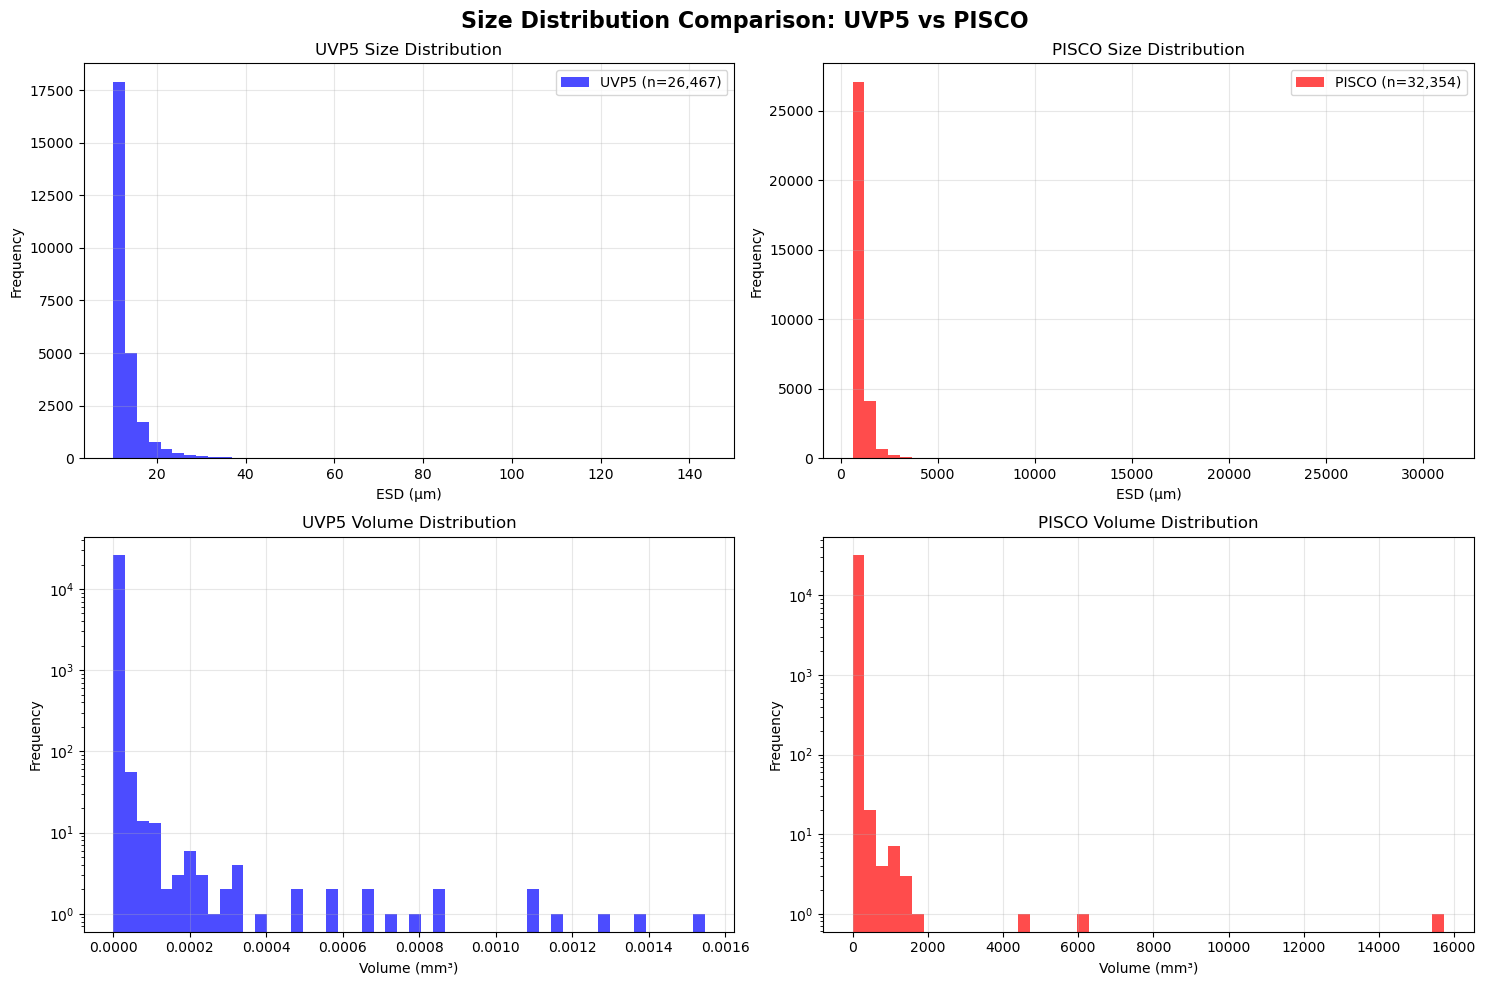


=== SIZE STATISTICS ===
UVP5  - ESD: median=11.8µm, mean=13.1µm
PISCO - ESD: median=957.6µm, mean=1046.0µm
Size ratio (PISCO/UVP5): 81x larger

UVP5  - Volume: median=8.56e-07mm³
PISCO - Volume: median=4.60e-01mm³
Volume ratio (PISCO/UVP5): 537141x larger

=== CONCLUSION ===
The datasets capture COMPLETELY DIFFERENT organism size classes:
• UVP5: Small organisms (~12µm) - microzooplankton
• PISCO: Large organisms (~958µm) - mesozooplankton
• This explains the biovolume differences - not a normalization issue!


In [10]:
def create_size_distribution_comparison():
    """
    Create plots showing the dramatic size difference between datasets
    """
    print("=== SIZE DISTRIBUTION ANALYSIS ===")
    
    # Get ESD data
    pisco_esd = pd.to_numeric(pisco_df['object_esd'], errors='coerce').dropna()
    uvp5_esd = pd.to_numeric(uvp5_crop['object_esd'], errors='coerce').dropna()
    
    # Calculate volumes for comparison
    pisco_vol = (4/3) * np.pi * (pisco_esd/2)**3 / 1e9  # mm³
    uvp5_vol = (4/3) * np.pi * (uvp5_esd/2)**3 / 1e9   # mm³
    
    # Create comparison plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # ESD histograms
    ax1.hist(uvp5_esd, bins=50, alpha=0.7, color='blue', label=f'UVP5 (n={len(uvp5_esd):,})')
    ax1.set_xlabel('ESD (µm)')
    ax1.set_ylabel('Frequency')
    ax1.set_title('UVP5 Size Distribution')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    ax2.hist(pisco_esd, bins=50, alpha=0.7, color='red', label=f'PISCO (n={len(pisco_esd):,})')
    ax2.set_xlabel('ESD (µm)')
    ax2.set_ylabel('Frequency')
    ax2.set_title('PISCO Size Distribution')
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    # Volume histograms (log scale)
    ax3.hist(uvp5_vol, bins=50, alpha=0.7, color='blue')
    ax3.set_xlabel('Volume (mm³)')
    ax3.set_ylabel('Frequency')
    ax3.set_title('UVP5 Volume Distribution')
    ax3.set_yscale('log')
    ax3.grid(alpha=0.3)
    
    ax4.hist(pisco_vol, bins=50, alpha=0.7, color='red')
    ax4.set_xlabel('Volume (mm³)')
    ax4.set_ylabel('Frequency')
    ax4.set_title('PISCO Volume Distribution')
    ax4.set_yscale('log')
    ax4.grid(alpha=0.3)
    
    plt.suptitle('Size Distribution Comparison: UVP5 vs PISCO', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n=== SIZE STATISTICS ===")
    print(f"UVP5  - ESD: median={uvp5_esd.median():.1f}µm, mean={uvp5_esd.mean():.1f}µm")
    print(f"PISCO - ESD: median={pisco_esd.median():.1f}µm, mean={pisco_esd.mean():.1f}µm")
    print(f"Size ratio (PISCO/UVP5): {pisco_esd.median()/uvp5_esd.median():.0f}x larger")
    
    print(f"\nUVP5  - Volume: median={uvp5_vol.median():.2e}mm³")
    print(f"PISCO - Volume: median={pisco_vol.median():.2e}mm³") 
    print(f"Volume ratio (PISCO/UVP5): {pisco_vol.median()/uvp5_vol.median():.0f}x larger")
    
    print(f"\n=== CONCLUSION ===")
    print(f"The datasets capture COMPLETELY DIFFERENT organism size classes:")
    print(f"• UVP5: Small organisms (~12µm) - microzooplankton")
    print(f"• PISCO: Large organisms (~958µm) - mesozooplankton") 
    print(f"• This explains the biovolume differences - not a normalization issue!")
    
    return fig

# Run size distribution analysis
if 'uvp5_crop' in locals() and 'pisco_df' in locals():
    size_fig = create_size_distribution_comparison()

In [11]:
def diagnose_zero_biovolume_issue():
    """
    Specifically diagnose why UVP5 biovolume shows as 0.000 in profile statistics
    """
    print("=== ZERO BIOVOLUME DIAGNOSTIC ===")
    
    # Check the actual values in uvp5_biovolume
    print("\n1. UVP5 BIOVOLUME DATA INSPECTION:")
    print(f"   Shape: {uvp5_biovolume.shape}")
    print(f"   Columns: {list(uvp5_biovolume.columns)}")
    
    # Check biovolume_mm3_per_L values
    if 'biovolume_mm3_per_L' in uvp5_biovolume.columns:
        bv_values = uvp5_biovolume['biovolume_mm3_per_L']
        print(f"\n2. BIOVOLUME_MM3_PER_L VALUES:")
        print(f"   Total records: {len(bv_values)}")
        print(f"   Non-null: {bv_values.notna().sum()}")
        print(f"   Non-zero: {(bv_values > 0).sum()}")
        print(f"   Range: {bv_values.min():.2e} to {bv_values.max():.2e}")
        print(f"   Sum: {bv_values.sum():.2e}")
        
        # Show some actual values
        print(f"\n   Sample values:")
        print(uvp5_biovolume[['sample_id', 'object_annotation_category', 'biovolume_mm3_per_L']].head(10))
        
        # Check values by profile
        print(f"\n3. BIOVOLUME BY PROFILE:")
        profile_biovolume = uvp5_biovolume.groupby('sample_id')['biovolume_mm3_per_L'].sum().sort_values(ascending=False)
        print("   Top profiles by biovolume:")
        print(profile_biovolume.head())
        
        # Check the exact values used in plotting
        print(f"\n4. PLOTTING AGGREGATION CHECK:")
        
        # Simulate the category mapping used in plotting
        uvp5_biovolume_proc = uvp5_biovolume.copy()
        category_mapping = {
            "Cnidaria<Metazoa": "Cnidaria",
            "Copepoda_total": "Copepoda"
        }
        
        for old_cat, new_cat in category_mapping.items():
            uvp5_biovolume_proc['object_annotation_category'] = uvp5_biovolume_proc['object_annotation_category'].replace(old_cat, new_cat)
        
        # Check profile-level aggregation as done in plotting
        uvp5_biovolume_by_profile = uvp5_biovolume_proc.groupby(['sample_id', 'object_annotation_category'])['biovolume_mm3_per_L'].sum().unstack(fill_value=0)
        
        print(f"   Profile-level biovolume matrix shape: {uvp5_biovolume_by_profile.shape}")
        print(f"   Profile totals:")
        profile_totals = uvp5_biovolume_by_profile.sum(axis=1)
        for profile, total in profile_totals.items():
            print(f"     {profile}: {total:.6f} mm³/L")
        
        # Check if the issue is in rounding/display
        print(f"\n5. PRECISION CHECK:")
        if profile_totals.max() > 0:
            max_val = profile_totals.max()
            print(f"   Maximum profile biovolume: {max_val:.2e} mm³/L")
            print(f"   Rounded to 3 decimals: {max_val:.3f} mm³/L")
            
            if max_val < 0.0005:  # Would round to 0.000
                print("   ⚠️  FOUND THE ISSUE! Biovolume values are too small for 3-decimal display")
                print("   Values are non-zero but round to 0.000 when displayed with 3 decimals")
            else:
                print("   Values should be visible with 3-decimal precision")
        else:
            print("   All biovolume values are actually zero - check calculation")
    
    else:
        print("   ✗ biovolume_mm3_per_L column missing")

# Run the zero biovolume diagnostic
if 'uvp5_biovolume' in locals():
    diagnose_zero_biovolume_issue()

=== ZERO BIOVOLUME DIAGNOSTIC ===

1. UVP5 BIOVOLUME DATA INSPECTION:
   Shape: (125, 3)
   Columns: ['sample_id', 'object_annotation_category', 'biovolume_mm3_per_L']

2. BIOVOLUME_MM3_PER_L VALUES:
   Total records: 125
   Non-null: 125
   Non-zero: 88
   Range: 0.00e+00 to 1.52e-04
   Sum: 5.26e-04

   Sample values:
    sample_id object_annotation_category  biovolume_mm3_per_L
0  c_m181_037             Appendicularia         0.000000e+00
1  c_m181_037               Chaetognatha         7.341845e-06
2  c_m181_037           Cnidaria<Metazoa         9.649242e-07
3  c_m181_037             Copepoda_total         5.458605e-06
4  c_m181_037                  Crustacea         2.837206e-07
5  c_m181_037             Eumalacostraca         2.632984e-08
6  c_m181_037                      Flota         0.000000e+00
7  c_m181_037                   Rhizaria         7.502759e-06
8  c_m181_037              Trichodesmium         1.243931e-06
9  c_m181_037                     bubble         1.059616e

In [12]:
def diagnose_pisco_low_counts():
    """
    Investigate why PISCO counts per liter are so low
    """
    print("=== PISCO LOW COUNTS DIAGNOSTIC ===")
    
    print("\n1. PISCO RAW DATA CHECK:")
    print(f"   Total PISCO organisms: {len(pisco_df):,}")
    print(f"   Unique PISCO profiles: {pisco_df['sample_id'].nunique()}")
    print(f"   Organisms per profile:")
    
    pisco_counts_per_profile = pisco_df['sample_id'].value_counts().sort_index()
    for profile, count in pisco_counts_per_profile.items():
        print(f"     {profile}: {count} organisms")
    
    print(f"\n2. PISCO IMAGE COUNT CHECK:")
    print(f"   Total images in metadata: {len(pisco_images):,}")
    print(f"   Unique image profiles: {pisco_images['sample_id'].nunique()}")
    print(f"   Images per profile:")
    
    image_counts_per_profile = pisco_images['sample_id'].value_counts().sort_index()
    for profile, count in image_counts_per_profile.items():
        print(f"     {profile}: {count} images")
    
    print(f"\n3. VOLUME CALCULATION CHECK:")
    print(f"   Volume per image: {VOLUME_PER_IMAGE_LITERS:.6f} L")
    
    # Check the profile matching logic
    print(f"\n4. PROFILE MATCHING CHECK:")
    pisco_profiles = sorted(pisco_df['sample_id'].unique())
    
    for p in pisco_profiles:
        parts = str(p).split('_')
        core_id = f"{parts[0]}_{parts[1]}" if len(parts) >= 2 else parts[0]
        nimg = image_counts_per_profile.get(core_id, 0)  # This should match the logic in process_pisco_for_comparison
        sampled_vol = nimg * VOLUME_PER_IMAGE_LITERS
        organism_count = pisco_counts_per_profile.get(p, 0)
        
        if sampled_vol > 0:
            density = organism_count / sampled_vol
            print(f"   {p}: {organism_count} organisms ÷ {sampled_vol:.3f} L = {density:.3f} organisms/L")
            print(f"     └─ Core ID: '{core_id}', Images: {nimg}")
        else:
            print(f"   {p}: {organism_count} organisms ÷ 0 L = ERROR - no images found for core_id '{core_id}'")
    
    print(f"\n5. POTENTIAL ISSUES:")
    issues = []
    
    # Check if profile names don't match image names
    pisco_core_ids = set()
    for p in pisco_profiles:
        parts = str(p).split('_')
        core_id = f"{parts[0]}_{parts[1]}" if len(parts) >= 2 else parts[0]
        pisco_core_ids.add(core_id)
    
    image_core_ids = set(pisco_images['sample_id'].unique())
    
    missing_in_images = pisco_core_ids - image_core_ids
    missing_in_pisco = image_core_ids - pisco_core_ids
    
    if missing_in_images:
        issues.append(f"PISCO profiles without matching images: {missing_in_images}")
    if missing_in_pisco:
        issues.append(f"Image profiles without matching PISCO data: {missing_in_pisco}")
    
    # Check if volumes are too large (too many images)
    total_images = image_counts_per_profile.sum()
    total_volume = total_images * VOLUME_PER_IMAGE_LITERS
    total_organisms = len(pisco_df)
    overall_density = total_organisms / total_volume
    
    print(f"   Total images: {total_images:,}")
    print(f"   Total volume: {total_volume:.3f} L")
    print(f"   Overall density: {overall_density:.3f} organisms/L")
    
    if overall_density < 5:
        issues.append("Overall density is very low - check if image count is inflated")
    
    # NEW: Calculate correct volumes using only profiles with organism data
    print(f"\n6. CORRECTED VOLUME CALCULATION:")
    correct_total_images = 0
    for p in pisco_profiles:
        parts = str(p).split('_')
        core_id = f"{parts[0]}_{parts[1]}" if len(parts) >= 2
        nimg = image_counts_per_profile.get(core_id, 0)
        correct_total_images += nimg
        print(f"   {core_id}: {nimg} images")
    
    correct_total_volume = correct_total_images * VOLUME_PER_IMAGE_LITERS
    correct_density = total_organisms / correct_total_volume if correct_total_volume > 0 else 0
    
    print(f"   Corrected total images: {correct_total_images:,}")
    print(f"   Corrected total volume: {correct_total_volume:.3f} L")
    print(f"   Corrected overall density: {correct_density:.3f} organisms/L")
    
    if issues:
        print(f"\n   Found {len(issues)} potential issues:")
        for i, issue in enumerate(issues, 1):
            print(f"     {i}. {issue}")
    else:
        print(f"   No obvious issues found - low density might be real")
    
    return {
        'pisco_profiles': pisco_profiles,
        'image_counts': image_counts_per_profile,
        'organism_counts': pisco_counts_per_profile,
        'total_volume': total_volume,
        'overall_density': overall_density,
        'corrected_volume': correct_total_volume,
        'corrected_density': correct_density
    }

# Run PISCO diagnostic
if 'pisco_df' in locals() and 'pisco_images' in locals():
    pisco_diagnostic = diagnose_pisco_low_counts()

SyntaxError: expected 'else' after 'if' expression (2352955679.py, line 84)

In [ ]:
# Detailed diagnostic to see what's happening with PISCO processing
def debug_pisco_processing():
    """
    Debug the PISCO processing step by step
    """
    print("=== PISCO PROCESSING DEBUG ===")
    
    # Check if data loaded
    if 'pisco_df' not in locals() and 'pisco_df' not in globals():
        print("❌ pisco_df not found - data loading failed")
        return False
    if 'pisco_images' not in locals() and 'pisco_images' not in globals():
        print("❌ pisco_images not found - data loading failed") 
        return False
        
    # Get the data (try both local and global scope)
    try:
        pdf = pisco_df if 'pisco_df' in locals() else globals().get('pisco_df')
        pimgs = pisco_images if 'pisco_images' in locals() else globals().get('pisco_images')
    except:
        print("❌ Could not access PISCO data variables")
        return False
    
    print(f"✓ Data loaded: {len(pdf)} organisms, {len(pimgs)} images")
    
    # Check organism profiles
    organism_profiles = sorted(pdf['sample_id'].unique())
    print(f"✓ Organism profiles ({len(organism_profiles)}): {organism_profiles}")
    
    # Check image profiles  
    image_profiles = sorted(pimgs['sample_id'].unique())
    print(f"✓ Image profiles ({len(image_profiles)}): {image_profiles[:10]}...")
    
    # Test CTD extraction
    def extract_ctd_number(sample_id):
        import re
        match = re.search(r'CTD-(\d+)', str(sample_id))
        if match:
            return match.group(1).zfill(3)
        return None
    
    # Get CTD numbers from organism profiles
    organism_ctd_numbers = set()
    for profile in organism_profiles:
        ctd_num = extract_ctd_number(profile)
        if ctd_num:
            organism_ctd_numbers.add(ctd_num)
    
    print(f"✓ Organism CTD numbers: {sorted(organism_ctd_numbers)}")
    
    # Check image CTD numbers
    image_ctd_numbers = set()
    for profile in image_profiles:
        ctd_num = extract_ctd_number(profile)
        if ctd_num:
            image_ctd_numbers.add(ctd_num)
    
    print(f"✓ Image CTD numbers: {sorted(list(image_ctd_numbers)[:10])}...")
    
    # Find matches
    matching_ctds = organism_ctd_numbers & image_ctd_numbers
    print(f"✓ Matching CTDs: {sorted(matching_ctds)}")
    
    if not matching_ctds:
        print("❌ No matching CTD numbers found!")
        print("This means the filtering will result in zero volume!")
        return False
    
    # Filter images
    matching_image_profiles = []
    for img_profile in pimgs['sample_id'].unique():
        img_ctd_num = extract_ctd_number(img_profile)
        if img_ctd_num and img_ctd_num in organism_ctd_numbers:
            matching_image_profiles.append(img_profile)
    
    print(f"✓ Matching image profiles: {len(matching_image_profiles)}")
    
    if len(matching_image_profiles) == 0:
        print("❌ No matching image profiles found!")
        return False
    
    # Test volume calculation
    filtered_images_df = pimgs[pimgs['sample_id'].isin(matching_image_profiles)]
    images_counts = filtered_images_df.groupby('sample_id').size().to_dict()
    
    total_images = sum(images_counts.values())
    total_volume = total_images * VOLUME_PER_IMAGE_LITERS
    
    print(f"✓ Filtered images: {total_images:,}")
    print(f"✓ Calculated volume: {total_volume:.3f} L")
    print(f"✓ Expected density: {len(pdf) / total_volume:.3f} organisms/L")
    
    return True

# Run the debug
success = debug_pisco_processing()

if success:
    print("\n✅ PISCO processing should work - try running cell 4 again")
else:
    print("\n❌ PISCO processing has issues - need to fix data loading")

=== PISCO PROCESSING DEBUG ===
✓ Data loaded: 32354 organisms, 729407 images
✓ Organism profiles (5): ['M181-112-1_CTD-037_00°00S-008°00W_20220504-1758', 'M181-175-1_CTD-050_00°00S-019°00W_20220509-0543', 'M181-227-1_CTD-060_00°00S-027°00W_20220512-1748', 'M181-285-1_CTD-075_00°00S-039°00W_20220517-2024', 'M181-297-1_CTD-081_00°00S-041°50W_20220519-0218']
✓ Image profiles (45): ['M181-107-1_CTD-036', 'M181-112-1_CTD-037', 'M181-117-1_CTD-038', 'M181-124-1_CTD-039', 'M181-126-1_CTD-040', 'M181-131-1_CTD-041', 'M181-134-1_CTD-042', 'M181-140-1_CTD-043', 'M181-146-1_CTD-044', 'M181-153-1_CTD-045']...
✓ Organism CTD numbers: ['037', '050', '060', '075', '081']
✓ Image CTD numbers: ['037', '038', '041', '049', '053', '055', '069', '070', '072', '078']...
✓ Matching CTDs: ['037', '050', '060', '075', '081']
✓ Matching image profiles: 5
✓ Filtered images: 91,632
✓ Calculated volume: 176320.631 L
✓ Expected density: 0.183 organisms/L

✅ PISCO processing should work - try running cell 4 again


In [13]:
def analyze_size_overlap_and_detection():
    """
    Investigate size overlap between UVP5 and PISCO to understand count differences
    """
    print("=== SIZE OVERLAP AND DETECTION ANALYSIS ===")
    
    if 'uvp5_crop' not in locals() or 'pisco_df' not in locals():
        print("❌ Data not available. Run previous cells first.")
        return
    
    # Get ESD data
    pisco_esd = pd.to_numeric(pisco_df['object_esd'], errors='coerce').dropna()
    uvp5_esd = pd.to_numeric(uvp5_crop['object_esd'], errors='coerce').dropna()
    
    print(f"PISCO ESD range: {pisco_esd.min():.1f} - {pisco_esd.max():.1f} µm")
    print(f"UVP5 ESD range: {uvp5_esd.min():.1f} - {uvp5_esd.max():.1f} µm")
    
    # Find overlapping size range
    overlap_min = max(pisco_esd.min(), uvp5_esd.min())
    overlap_max = min(pisco_esd.max(), uvp5_esd.max())
    
    print(f"\nOverlapping size range: {overlap_min:.1f} - {overlap_max:.1f} µm")
    
    if overlap_max > overlap_min:
        # Count organisms in overlapping range
        pisco_overlap = pisco_esd[(pisco_esd >= overlap_min) & (pisco_esd <= overlap_max)]
        uvp5_overlap = uvp5_esd[(uvp5_esd >= overlap_min) & (uvp5_esd <= overlap_max)]
        
        print(f"\nOrganisms in overlapping range:")
        print(f"  PISCO: {len(pisco_overlap):,} / {len(pisco_esd):,} ({len(pisco_overlap)/len(pisco_esd)*100:.1f}%)")
        print(f"  UVP5: {len(uvp5_overlap):,} / {len(uvp5_esd):,} ({len(uvp5_overlap)/len(uvp5_esd)*100:.1f}%)")
        
        # Calculate density in overlapping range (need volume data)
        print(f"\n=== DENSITY COMPARISON IN OVERLAPPING RANGE ===")
        
        # This would require recalculating densities for just the overlapping size range
        # For now, let's look at size distribution patterns
        
        # Create detailed size distribution plot
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # Full range histograms (log scale)
        ax1.hist(uvp5_esd, bins=50, alpha=0.7, color='blue', label=f'UVP5 (n={len(uvp5_esd):,})')
        ax1.set_xlabel('ESD (µm)')
        ax1.set_ylabel('Count')
        ax1.set_title('UVP5 Full Size Range')
        ax1.set_xscale('log')
        ax1.legend()
        ax1.grid(alpha=0.3)
        
        ax2.hist(pisco_esd, bins=50, alpha=0.7, color='red', label=f'PISCO (n={len(pisco_esd):,})')
        ax2.set_xlabel('ESD (µm)')
        ax2.set_ylabel('Count')
        ax2.set_title('PISCO Full Size Range')
        ax2.set_xscale('log')
        ax2.legend()
        ax2.grid(alpha=0.3)
        
        # Overlapping range histograms
        if len(pisco_overlap) > 0 and len(uvp5_overlap) > 0:
            bins = np.logspace(np.log10(overlap_min), np.log10(overlap_max), 30)
            
            ax3.hist(uvp5_overlap, bins=bins, alpha=0.7, color='blue', label=f'UVP5 overlap (n={len(uvp5_overlap):,})')
            ax3.set_xlabel('ESD (µm)')
            ax3.set_ylabel('Count')
            ax3.set_title('Overlapping Size Range')
            ax3.set_xscale('log')
            ax3.legend()
            ax3.grid(alpha=0.3)
            
            ax4.hist(pisco_overlap, bins=bins, alpha=0.7, color='red', label=f'PISCO overlap (n={len(pisco_overlap):,})')
            ax4.set_xlabel('ESD (µm)')
            ax4.set_ylabel('Count')
            ax4.set_title('Overlapping Size Range')
            ax4.set_xscale('log')
            ax4.legend()
            ax4.grid(alpha=0.3)
        
        plt.suptitle('Size Range Analysis: Investigating Detection Overlap', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Analyze potential reasons for count differences
        print(f"\n=== POTENTIAL EXPLANATIONS FOR COUNT DIFFERENCES ===")
        
        reasons = [
            "1. Detection threshold differences:",
            "   • UVP5 may have lower size detection threshold",
            "   • PISCO may miss very small organisms due to imaging resolution",
            "",
            "2. Classification differences:", 
            "   • UVP5 may classify small particles as organisms that PISCO rejects",
            "   • Different validation criteria between datasets",
            "",
            "3. Sampling volume calculation:",
            "   • UVP5 uses measured volumes per depth bin",
            "   • PISCO uses calculated volumes from image counts",
            "   • Potential systematic difference in volume estimates",
            "",
            "4. Temporal/spatial sampling differences:",
            "   • Different sampling times or locations within CTD casts",
            "   • Different flow rates or sampling efficiency"
        ]
        
        for reason in reasons:
            print(reason)
            
        # Calculate what PISCO count would need to be to match UVP5 density
        if 'uvp5_counts' in locals() and 'pisco_counts' in locals():
            uvp5_total_density = uvp5_counts['counts_per_L'].sum()
            pisco_total_density = pisco_counts['counts_per_L'].sum()
            
            print(f"\n=== QUANTITATIVE COMPARISON ===")
            print(f"UVP5 total density: {uvp5_total_density:.2f} counts/L")
            print(f"PISCO total density: {pisco_total_density:.2f} counts/L")
            print(f"Ratio: {uvp5_total_density/pisco_total_density:.1f}x difference")
            
            # What would PISCO volume need to be to match UVP5 density?
            pisco_raw_count = len(pisco_df)
            required_volume_for_uvp5_density = pisco_raw_count / uvp5_total_density
            
            if 'pisco_counts' in locals():
                current_pisco_volume = pisco_counts['sampled_volume_L'].sum() if 'sampled_volume_L' in pisco_counts.columns else 0
                print(f"\nTo match UVP5 density, PISCO would need:")
                print(f"  Required volume: {required_volume_for_uvp5_density:.3f} L")
                print(f"  Current volume: {current_pisco_volume:.3f} L") 
                print(f"  Volume ratio: {current_pisco_volume/required_volume_for_uvp5_density:.1f}x too large")
    else:
        print("❌ No overlapping size range found between datasets")
        print("This suggests completely different organism size classes")

# Run the overlap analysis
if 'uvp5_crop' in locals() and 'pisco_df' in locals():
    analyze_size_overlap_and_detection()

=== SIZE OVERLAP AND DETECTION ANALYSIS ===
❌ Data not available. Run previous cells first.
